## Chi-Square Test- 

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [240]:
import scipy.stats as stats

In [56]:
import seaborn as sns
import pandas as pd
import numpy as np
dataset=pd.read_csv(r'/Users/zoyasyed/Downloads/Datasets/titanic2aa25010d567c17bff6dbd56a4bf1ff207cfedbf0635313334aee2be2336a9e2/titanic new.csv')
type(dataset)

pandas.core.frame.DataFrame

In [57]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
dataset_table=pd.crosstab(dataset['Embarked'],dataset['Survived'])
print(dataset_table)

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


In [135]:
dataset_table.values 

array([[ 75,  93],
       [ 47,  30],
       [427, 217]])

In [136]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[ 75  93]
 [ 47  30]
 [427 217]]


In [137]:
val=stats.chi2_contingency(dataset_table)

In [29]:
val

(0.008763290531773594, 0.925417020494423, 1, array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [138]:
Expected_Values=val[3]
Expected_Values

array([[103.7480315,  64.2519685],
       [ 47.5511811,  29.4488189],
       [397.7007874, 246.2992126]])

In [139]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


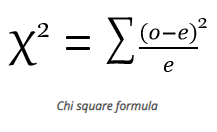

In [140]:
import scipy
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]



In [ ]:
#scipy.stats.chisquare(Observed_Values,f_exp,ddof)

#scipy.stats.chisquare(0)

In [141]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 26.48914983923762


In [142]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [143]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 2.6502249006465917e-07
Significance level:  0.05
Degree of Freedom:  1
p-value: 2.6502249006465917e-07


In [144]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


## T Test

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

##  One-sample T-test with Python

The test will tell us whether means of the sample and the population are different

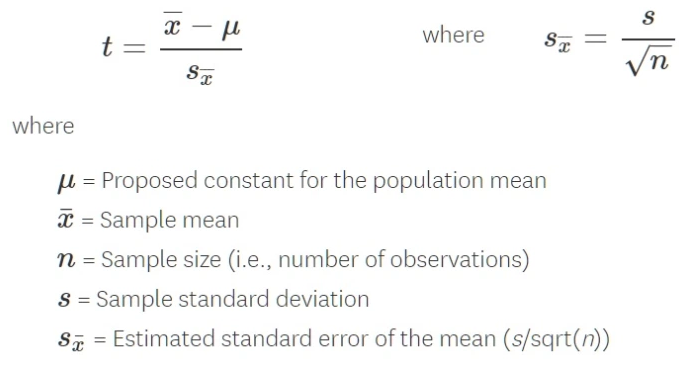

In [59]:

Male = np.array([np.mean(dataset[dataset["Sex"]=="male"].sample(20)["Survived"].values) for i in range(100)])
Female = np.array([np.mean(dataset[dataset["Sex"]=="female"].sample(20)["Survived"].values) for i in range(100)])

dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
len(Male)

100

In [66]:
import numpy as np
gender_mean=np.mean(Male)
print(gender_mean)

0.192


In [67]:
## Lets take sample

sample_size=10
age_sample=np.random.choice(Male,sample_size)

In [68]:
age_sample

array([0.25, 0.1 , 0.2 , 0.4 , 0.2 , 0.15, 0.  , 0.15, 0.15, 0.25])

In [69]:
from scipy.stats import ttest_1samp

In [70]:
ttest,p_value=ttest_1samp(age_sample,30)

In [71]:
print(ttest)

-893.3340295092881


In [72]:
print(p_value)

1.4051603779306394e-23


In [73]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Some More Examples
Consider the age of students in a college and in Class A

In [349]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)


In [350]:
classA_ages.mean()

46.9

In [351]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())

In [353]:
p_value

1.139027071016194e-13

In [352]:
school_ages.mean()

53.303333333333335

In [354]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

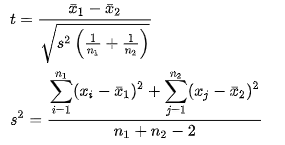


In [146]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:

Parch0 = np.array([np.mean(dataset[dataset["Parch"]==0].sample(20)["Survived"].values) for i in range(100)])
Parch1 = np.array([np.mean(dataset[dataset["Parch"]==1].sample(20)["Survived"].values) for i in range(100)])

np.random.seed(12)
Parch0_survival=stats.poisson.rvs(loc=18,mu=33,size=60)
print(Parch0_survival.mean())
print(Parch0_survival.std())
print(Parch0_survival)
Parch1_survival=stats.poisson.rvs(loc=16,mu=32,size=60)
print(Parch1_survival)
print(Parch1_survival.mean())
print(Parch1_survival.std())

50.63333333333333
5.9664804440213235
[44 47 60 65 47 52 56 56 44 48 50 47 55 49 50 50 50 41 53 47 39 50 52 43
 53 51 59 53 51 46 41 53 63 53 48 65 63 54 49 53 48 45 49 59 50 51 56 45
 56 43 43 47 54 48 45 41 60 48 51 49]
[50 41 50 45 50 51 43 50 46 52 40 47 53 50 48 48 41 52 39 48 43 49 51 46
 45 51 43 53 50 49 54 56 41 46 40 48 48 46 54 50 45 46 43 52 45 33 42 43
 45 51 47 50 56 46 47 52 55 38 43 41]
47.11666666666667
4.785713693437538


In [148]:
two_test,p_value=stats.ttest_ind(a=Parch0_survival,b=Parch1_survival,equal_var=False)
print(two_test)
print(p_value)
print()

3.531604489145108
0.0005996120604758745



In [149]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [124]:
sib1 = np.array([np.mean(dataset[dataset["SibSp"]==0].sample(20)["Survived"].values) for i in range(100)])
sib2 = np.array([np.mean(dataset[dataset["SibSp"]==1].sample(20)["Survived"].values) for i in range(100)])
#PClass3 = np.array([np.mean(dataset[dataset["Pclass"]==3].sample(20)["Survived"].values) for i in range(100)])
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
print(sib1)
print(sib2)


[0.25 0.4  0.35 0.45 0.35 0.45 0.2  0.4  0.4  0.25 0.45 0.25 0.45 0.3
 0.3  0.35 0.25 0.35 0.25 0.35 0.4  0.45 0.3  0.35 0.5  0.35 0.55 0.4
 0.35 0.25 0.6  0.4  0.35 0.35 0.4  0.15 0.25 0.35 0.65 0.45 0.2  0.5
 0.5  0.4  0.35 0.3  0.35 0.45 0.3  0.4  0.3  0.4  0.2  0.4  0.15 0.45
 0.35 0.4  0.4  0.25 0.25 0.25 0.35 0.05 0.15 0.5  0.4  0.2  0.35 0.25
 0.45 0.35 0.2  0.3  0.3  0.15 0.2  0.4  0.4  0.3  0.2  0.25 0.35 0.35
 0.3  0.25 0.3  0.35 0.4  0.3  0.35 0.3  0.4  0.35 0.25 0.35 0.4  0.2
 0.35 0.3 ]
[0.3  0.5  0.5  0.4  0.6  0.65 0.55 0.7  0.5  0.6  0.6  0.55 0.45 0.4
 0.55 0.7  0.35 0.55 0.75 0.5  0.5  0.45 0.3  0.55 0.55 0.5  0.5  0.55
 0.55 0.55 0.55 0.55 0.75 0.4  0.5  0.7  0.5  0.4  0.7  0.65 0.6  0.5
 0.45 0.65 0.7  0.55 0.5  0.75 0.4  0.35 0.5  0.65 0.45 0.5  0.45 0.45
 0.55 0.5  0.3  0.4  0.4  0.45 0.65 0.5  0.5  0.45 0.7  0.55 0.4  0.45
 0.35 0.6  0.6  0.45 0.75 0.6  0.4  0.5  0.45 0.55 0.4  0.55 0.35 0.45
 0.55 0.5  0.45 0.45 0.55 0.65 0.6  0.6  0.75 0.7  0.45 0.55 0.5  0.5
 

In [128]:
weight_df=pd.DataFrame({"Sib_one":np.array(PClass1),
                        "Sib_zero":np.array(PClass3),
                       "weight_change":np.array(sib2)-np.array(sib1)})
weight_df

,Sib_one,Sib_zero,weight_change
0,0.75,0.10,0.05
1,0.60,0.25,0.10
2,0.60,0.40,0.15
3,0.65,0.30,-0.05
4,0.60,0.40,0.25
...,...,...,...
95,0.50,0.25,0.20
96,0.70,0.30,0.10
97,0.45,0.15,0.30
98,0.65,0.25,0.20


In [129]:
_,p_value=stats.ttest_rel(a=sib1,b=sib2)

In [130]:
print(p_value)

9.622685565077386e-24


In [131]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Correlation

In [86]:
import seaborn as sns
import pandas as pd
import numpy as np
df=pd.read_csv(r'/Users/zoyasyed/Downloads/Datasets/titanic2aa25010d567c17bff6dbd56a4bf1ff207cfedbf0635313334aee2be2336a9e2/titanic new.csv')
type(df)

pandas.core.frame.DataFrame

In [87]:
df.shape

(891, 12)

In [88]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


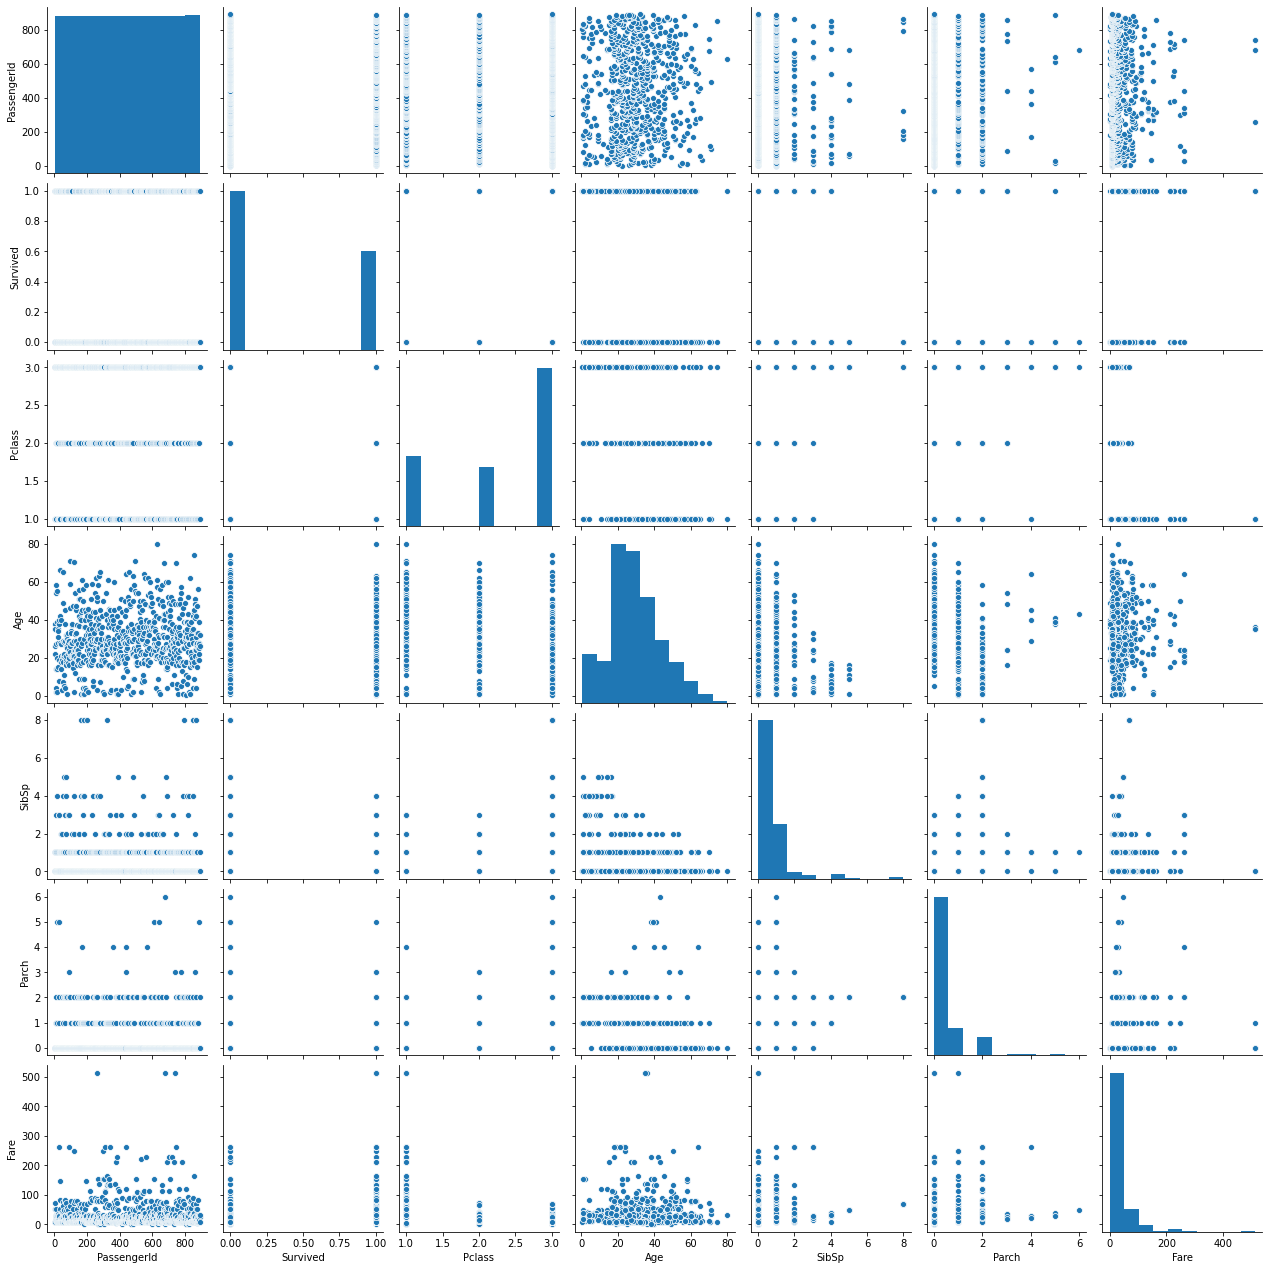

In [89]:
sns.pairplot(df)

## Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.


For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

### One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not 


In [201]:
import seaborn as sns
import pandas as pd
import numpy as np
df1=pd.read_csv(r'/Users/zoyasyed/Downloads/Datasets/titanic2aa25010d567c17bff6dbd56a4bf1ff207cfedbf0635313334aee2be2336a9e2/titanic new.csv')
type(dataset)

pandas.core.frame.DataFrame

In [222]:
df1.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
df_anova = df1[['Survived','Sex']]
df_anova

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [233]:
grps = pd.unique(df_anova.Sex.values)
grps


array(['male', 'female'], dtype=object)

In [234]:
d_data = {grp:df_anova['Sex'][df_anova.Survived == grp] for grp in grps}
d_data

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


{'male': Series([], Name: Sex, dtype: object),
 'female': Series([], Name: Sex, dtype: object)}

In [243]:
F, p = stats.f_oneway(d_data['male'], d_data['female'])


In [244]:
print(p)
print(F)

nan
nan


In [219]:
if p<0.05:
    print("reject null hypothesis")
    print(p)
else:
    print("accept null hypothesis")

accept null hypothesis


In [42]:
df1['survived'].mean()

0.3838383838383838